<a href="https://colab.research.google.com/github/zaephaer/MLU-11-Titanic-EnsembleML/blob/main/Titanic_02_RandomForest_with_ExtraTrees.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Bagging Machine Learning Algorithm (Part 2)

In [2]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import pandas as pd

df = pd.read_csv("https://raw.githubusercontent.com/zaephaer/MLU-11-Titanic-EnsembleML/main/titanic_dataset.csv")
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [3]:
df.shape

(891, 12)

## Focus only 3 feature of Pclass, Sex and Age

In [4]:
# Looking at Pclass feature
df['Pclass'].unique()
df['Pclass'].value_counts()

3    491
1    216
2    184
Name: Pclass, dtype: int64

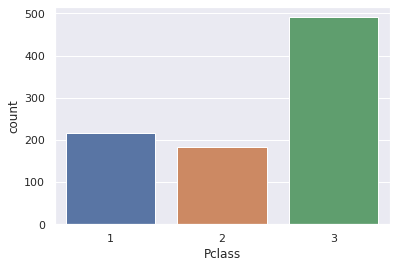

In [5]:
import seaborn as sns
sns.set(style="darkgrid")
ax = sns.countplot(x="Pclass", data=df)

In [6]:
# Looking at Sex feature
df['Sex'].unique()
df['Sex'].value_counts()

male      577
female    314
Name: Sex, dtype: int64

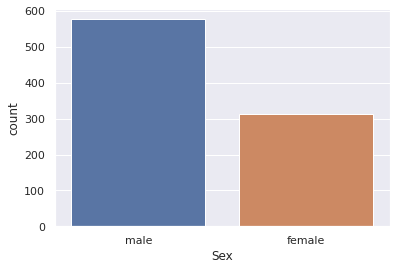

In [7]:
sns.set(style="darkgrid")
ax = sns.countplot(x="Sex", data=df)

In [8]:
# Looking at Sex feature
df['Age'].unique()
df['Age'].value_counts()

24.00    30
22.00    27
18.00    26
19.00    25
30.00    25
         ..
55.50     1
70.50     1
66.00     1
23.50     1
0.42      1
Name: Age, Length: 88, dtype: int64

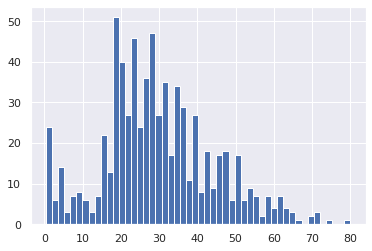

In [9]:
df['Age'].hist(bins=50);

In [10]:
# Looking at Survived target
df['Survived'].unique()
df['Survived'].value_counts()

0    549
1    342
Name: Survived, dtype: int64

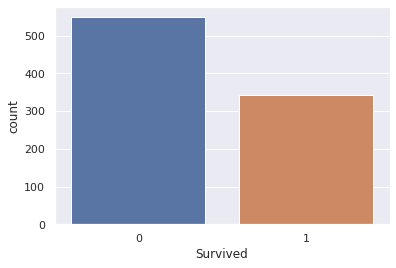

In [11]:
sns.set(style="darkgrid")
ax = sns.countplot(x="Survived", data=df)

# Data Pre-processing

In [12]:
# Temporarily store feature and target dataset
subset = df[['Pclass', 'Sex', 'Age', 'Survived']].copy()

# Dropping row with 'Null' value
subset.dropna(inplace=True)

# Assigning Features
X = subset[['Pclass', 'Sex', 'Age']].copy()
X.head()

,Pclass,Sex,Age
0,3,male,22.0
1,1,female,38.0
2,3,female,26.0
3,1,female,35.0
4,3,male,35.0


In [13]:
from sklearn import preprocessing
le = preprocessing.LabelEncoder()

# Using Label Encoder to transform categorical data
X['Sex'] = le.fit_transform(subset['Sex'])

# Looking back at X after transform 'Sex'
X.head()

,Pclass,Sex,Age
0,3,1,22.0
1,1,0,38.0
2,3,0,26.0
3,1,0,35.0
4,3,1,35.0


In [14]:
X.describe()

,Pclass,Sex,Age
count,714.000000,714.000000,714.000000
mean,2.236695,0.634454,29.699118
std,0.838250,0.481921,14.526497
min,1.000000,0.000000,0.420000
25%,1.000000,0.000000,20.125000
50%,2.000000,1.000000,28.000000
75%,3.000000,1.000000,38.000000
max,3.000000,1.000000,80.000000


In [15]:
# Assigning Target
y = subset['Survived'].copy()
print(y.value_counts())
print("Total: ", y.value_counts()[0] + y.value_counts()[1])

0    424
1    290
Name: Survived, dtype: int64
Total:  714


# Modelling

In [16]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1)

In [17]:
from sklearn import preprocessing
from sklearn.model_selection import cross_val_score, cross_val_predict
from sklearn.metrics import accuracy_score, classification_report
from sklearn.metrics import confusion_matrix, roc_auc_score
def print_score(clf, X_train, X_test, y_train, y_test, train=True):
    '''
    v0.1 Follow the scikit learn library format in terms of input
    print the accuracy score, classification report and confusion matrix of classifier
    '''
    lb = preprocessing.LabelBinarizer()
    lb.fit(y_train)
    if train:
        '''
        training performance
        '''
        res = clf.predict(X_train)
        print("Train Result:\n")
        print("accuracy score: {0:.4f}\n".format(accuracy_score(y_train, 
                                                                res)))
        print("Classification Report: \n {}\n".format(classification_report(y_train, 
                                                                            res)))
        print("Confusion Matrix: \n {}\n".format(confusion_matrix(y_train, 
                                                                  res)))
        print("ROC AUC: {0:.4f}\n".format(roc_auc_score(lb.transform(y_train), 
                                                      lb.transform(res))))

        res = cross_val_score(clf, X_train, y_train, cv=10, scoring='accuracy')
        print("Average Accuracy: \t {0:.4f}".format(np.mean(res)))
        print("Accuracy SD: \t\t {0:.4f}".format(np.std(res)))
        
    elif train==False:
        '''
        test performance
        '''
        res_test = clf.predict(X_test)
        print("Test Result:\n")        
        print("accuracy score: {0:.4f}\n".format(accuracy_score(y_test, 
                                                                res_test)))
        print("Classification Report: \n {}\n".format(classification_report(y_test, 
                                                                            res_test)))
        print("Confusion Matrix: \n {}\n".format(confusion_matrix(y_test, 
                                                                  res_test)))   
        print("ROC AUC: {0:.4f}\n".format(roc_auc_score(lb.transform(y_test), 
                                                      lb.transform(res_test))))

# Random Forest Algorithm

In [18]:
from sklearn.ensemble import RandomForestClassifier
rf_clf = RandomForestClassifier(random_state=42, n_estimators=100)
rf_clf.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=42, verbose=0,
                       warm_start=False)

In [19]:
print_score(rf_clf, X_train, X_test, y_train, y_test, train=True)
print("\n******************************\n")
print_score(rf_clf, X_train, X_test, y_train, y_test, train=False)

Train Result:

accuracy score: 0.8972

Classification Report: 
               precision    recall  f1-score   support

           0       0.88      0.95      0.92       374
           1       0.92      0.82      0.87       268

    accuracy                           0.90       642
   macro avg       0.90      0.89      0.89       642
weighted avg       0.90      0.90      0.90       642


Confusion Matrix: 
 [[356  18]
 [ 48 220]]

ROC AUC: 0.8864

Average Accuracy: 	 0.7897
Accuracy SD: 		 0.0383

******************************

Test Result:

accuracy score: 0.8472

Classification Report: 
               precision    recall  f1-score   support

           0       0.90      0.88      0.89        50
           1       0.74      0.77      0.76        22

    accuracy                           0.85        72
   macro avg       0.82      0.83      0.82        72
weighted avg       0.85      0.85      0.85        72


Confusion Matrix: 
 [[44  6]
 [ 5 17]]

ROC AUC: 0.8264



# Grid Search

In [20]:
rf_clf = RandomForestClassifier(random_state=42, n_estimators=100)
params_grid = {"max_depth": [3, None],
               "min_samples_split": [2, 3, 10],
               "min_samples_leaf": [1, 3, 10],
               "bootstrap": [True, False],
               "criterion": ['gini', 'entropy']}

In [21]:
from sklearn.model_selection import GridSearchCV
grid_search = GridSearchCV(rf_clf, params_grid,
                           n_jobs=-1, cv=5,
                           verbose=1, scoring='accuracy',
                           iid=False)
grid_search.fit(X_train, y_train)

Fitting 5 folds for each of 72 candidates, totalling 360 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  46 tasks      | elapsed:    8.5s
[Parallel(n_jobs=-1)]: Done 196 tasks      | elapsed:   31.3s
[Parallel(n_jobs=-1)]: Done 360 out of 360 | elapsed:   51.6s finished
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_search.py:823: FutureWarning: The parameter 'iid' is deprecated in 0.22 and will be removed in 0.24.
  "removed in 0.24.", FutureWarning


GridSearchCV(cv=5, error_score=nan,
             estimator=RandomForestClassifier(bootstrap=True, ccp_alpha=0.0,
                                              class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features='auto',
                                              max_leaf_nodes=None,
                                              max_samples=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              n_estimators=100, n_jobs=None,
                                              oob_score=False, random_state=42,
                                  

In [22]:
grid_search.best_score_

0.8161458333333332

In [23]:
grid_search.best_estimator_.get_params()

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': 'auto',
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_impurity_split': None,
 'min_samples_leaf': 3,
 'min_samples_split': 10,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 100,
 'n_jobs': None,
 'oob_score': False,
 'random_state': 42,
 'verbose': 0,
 'warm_start': False}

In [24]:
print_score(grid_search, X_train, X_test, y_train, y_test, train=True)
print("\n******************************\n")
print_score(grid_search, X_train, X_test, y_train, y_test, train=False)

Train Result:

accuracy score: 0.8567

Classification Report: 
               precision    recall  f1-score   support

           0       0.85      0.91      0.88       374
           1       0.86      0.78      0.82       268

    accuracy                           0.86       642
   macro avg       0.86      0.85      0.85       642
weighted avg       0.86      0.86      0.86       642


Confusion Matrix: 
 [[340  34]
 [ 58 210]]

ROC AUC: 0.8463

Fitting 5 folds for each of 72 candidates, totalling 360 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  46 tasks      | elapsed:    6.9s
[Parallel(n_jobs=-1)]: Done 196 tasks      | elapsed:   29.6s
[Parallel(n_jobs=-1)]: Done 360 out of 360 | elapsed:   49.7s finished
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_search.py:823: FutureWarning: The parameter 'iid' is deprecated in 0.22 and will be removed in 0.24.
  "removed in 0.24.", FutureWarning
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.


Fitting 5 folds for each of 72 candidates, totalling 360 fits


[Parallel(n_jobs=-1)]: Done  46 tasks      | elapsed:    6.9s
[Parallel(n_jobs=-1)]: Done 196 tasks      | elapsed:   29.2s
[Parallel(n_jobs=-1)]: Done 360 out of 360 | elapsed:   49.1s finished
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_search.py:823: FutureWarning: The parameter 'iid' is deprecated in 0.22 and will be removed in 0.24.
  "removed in 0.24.", FutureWarning
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.


Fitting 5 folds for each of 72 candidates, totalling 360 fits


[Parallel(n_jobs=-1)]: Done  46 tasks      | elapsed:    6.8s
[Parallel(n_jobs=-1)]: Done 196 tasks      | elapsed:   29.2s
[Parallel(n_jobs=-1)]: Done 360 out of 360 | elapsed:   49.1s finished
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_search.py:823: FutureWarning: The parameter 'iid' is deprecated in 0.22 and will be removed in 0.24.
  "removed in 0.24.", FutureWarning
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.


Fitting 5 folds for each of 72 candidates, totalling 360 fits


[Parallel(n_jobs=-1)]: Done  46 tasks      | elapsed:    6.8s
[Parallel(n_jobs=-1)]: Done 196 tasks      | elapsed:   29.1s
[Parallel(n_jobs=-1)]: Done 360 out of 360 | elapsed:   49.1s finished
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_search.py:823: FutureWarning: The parameter 'iid' is deprecated in 0.22 and will be removed in 0.24.
  "removed in 0.24.", FutureWarning
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.


Fitting 5 folds for each of 72 candidates, totalling 360 fits


[Parallel(n_jobs=-1)]: Done  46 tasks      | elapsed:    6.8s
[Parallel(n_jobs=-1)]: Done 196 tasks      | elapsed:   29.1s
[Parallel(n_jobs=-1)]: Done 360 out of 360 | elapsed:   49.0s finished
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_search.py:823: FutureWarning: The parameter 'iid' is deprecated in 0.22 and will be removed in 0.24.
  "removed in 0.24.", FutureWarning
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.


Fitting 5 folds for each of 72 candidates, totalling 360 fits


[Parallel(n_jobs=-1)]: Done  46 tasks      | elapsed:    6.8s
[Parallel(n_jobs=-1)]: Done 196 tasks      | elapsed:   29.1s
[Parallel(n_jobs=-1)]: Done 360 out of 360 | elapsed:   49.0s finished
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_search.py:823: FutureWarning: The parameter 'iid' is deprecated in 0.22 and will be removed in 0.24.
  "removed in 0.24.", FutureWarning
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.


Fitting 5 folds for each of 72 candidates, totalling 360 fits


[Parallel(n_jobs=-1)]: Done  46 tasks      | elapsed:    6.8s
[Parallel(n_jobs=-1)]: Done 196 tasks      | elapsed:   28.9s
[Parallel(n_jobs=-1)]: Done 360 out of 360 | elapsed:   48.9s finished
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_search.py:823: FutureWarning: The parameter 'iid' is deprecated in 0.22 and will be removed in 0.24.
  "removed in 0.24.", FutureWarning
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.


Fitting 5 folds for each of 72 candidates, totalling 360 fits


[Parallel(n_jobs=-1)]: Done  46 tasks      | elapsed:    6.9s
[Parallel(n_jobs=-1)]: Done 196 tasks      | elapsed:   29.0s
[Parallel(n_jobs=-1)]: Done 360 out of 360 | elapsed:   48.9s finished
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_search.py:823: FutureWarning: The parameter 'iid' is deprecated in 0.22 and will be removed in 0.24.
  "removed in 0.24.", FutureWarning
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.


Fitting 5 folds for each of 72 candidates, totalling 360 fits


[Parallel(n_jobs=-1)]: Done  46 tasks      | elapsed:    6.8s
[Parallel(n_jobs=-1)]: Done 196 tasks      | elapsed:   28.9s
[Parallel(n_jobs=-1)]: Done 360 out of 360 | elapsed:   48.7s finished
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_search.py:823: FutureWarning: The parameter 'iid' is deprecated in 0.22 and will be removed in 0.24.
  "removed in 0.24.", FutureWarning
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.


Fitting 5 folds for each of 72 candidates, totalling 360 fits


[Parallel(n_jobs=-1)]: Done  46 tasks      | elapsed:    6.9s
[Parallel(n_jobs=-1)]: Done 196 tasks      | elapsed:   29.1s
[Parallel(n_jobs=-1)]: Done 360 out of 360 | elapsed:   49.0s finished
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_search.py:823: FutureWarning: The parameter 'iid' is deprecated in 0.22 and will be removed in 0.24.
  "removed in 0.24.", FutureWarning


Average Accuracy: 	 0.7866
Accuracy SD: 		 0.0493

******************************

Test Result:

accuracy score: 0.8194

Classification Report: 
               precision    recall  f1-score   support

           0       0.89      0.84      0.87        50
           1       0.68      0.77      0.72        22

    accuracy                           0.82        72
   macro avg       0.79      0.81      0.79        72
weighted avg       0.83      0.82      0.82        72


Confusion Matrix: 
 [[42  8]
 [ 5 17]]

ROC AUC: 0.8064



# Extra-Trees (Extremely Randomized Trees) Ensemble

In [25]:
from sklearn.ensemble import ExtraTreesClassifier
xt_clf = ExtraTreesClassifier(random_state=42, n_estimators=100)
xt_clf.fit(X_train, y_train)

ExtraTreesClassifier(bootstrap=False, ccp_alpha=0.0, class_weight=None,
                     criterion='gini', max_depth=None, max_features='auto',
                     max_leaf_nodes=None, max_samples=None,
                     min_impurity_decrease=0.0, min_impurity_split=None,
                     min_samples_leaf=1, min_samples_split=2,
                     min_weight_fraction_leaf=0.0, n_estimators=100,
                     n_jobs=None, oob_score=False, random_state=42, verbose=0,
                     warm_start=False)

In [26]:
print_score(xt_clf, X_train, X_test, y_train, y_test, train=True)
print("\n******************************\n")
print_score(xt_clf, X_train, X_test, y_train, y_test, train=False)

Train Result:

accuracy score: 0.8972

Classification Report: 
               precision    recall  f1-score   support

           0       0.87      0.96      0.92       374
           1       0.94      0.81      0.87       268

    accuracy                           0.90       642
   macro avg       0.91      0.88      0.89       642
weighted avg       0.90      0.90      0.90       642


Confusion Matrix: 
 [[360  14]
 [ 52 216]]

ROC AUC: 0.8843

Average Accuracy: 	 0.7928
Accuracy SD: 		 0.0458

******************************

Test Result:

accuracy score: 0.8472

Classification Report: 
               precision    recall  f1-score   support

           0       0.90      0.88      0.89        50
           1       0.74      0.77      0.76        22

    accuracy                           0.85        72
   macro avg       0.82      0.83      0.82        72
weighted avg       0.85      0.85      0.85        72


Confusion Matrix: 
 [[44  6]
 [ 5 17]]

ROC AUC: 0.8264

